In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import copy

In [10]:
class Data_Handler():
    def __init__(self, dataset_name, maximization=True):

        # Parameters:
        # dataset_name (string)
        #       name of the dataset to use. Options include ['Crossed barrel', 'Perovskite', 'AgNP', 'P3HT', 'AutoAM']
        # maximization (boolean)
        #       If true then the objective value will be positive (maximization objective problem, use for P3HT/CNT, Crossed barrel, AutoAM)
        #       If false then the objective value will be negative (minimzation objective problem, use for Perovskite, AgNP)

        self.dataset = self.load_data(dataset_name)
        self.normalized_dataset = self.process_data(maximization)


    def load_data(self, dataset_name):

        # Parameters:
        # dataset_name (string)
        #       name of the dataset to use. Options include ['Crossed barrel', 'Perovskite', 'AgNP', 'P3HT', 'AutoAM']
        # Outputs:
        # dataset (pd.DataFrame)
        #       dataset in the form of a pandas dataframe

        raw_dataset = pd.read_csv('datasets/' + dataset_name + '_dataset.csv')
        dataset = copy.deepcopy(raw_dataset) 

        return dataset
    

    def process_data(self, maximization):

        # Parameters:
        # maximization (boolean)
        #       If true then the objective value will be positive (maximization objective problem, use for P3HT/CNT, Crossed barrel, AutoAM)
        #       If false then the objective value will be negative (minimzation objective problem, use for Perovskite, AgNP)
        # Outputs:
        # grouped_dataset (pd.DataFrame)
        #       to perform pool-based active learning, need to group the data by unique input feature x value
        #       for each unique x in design space, only keep the average of all evaluations there as its objective value

        feature_names, objective_name = list(self.dataset.columns)[:-1], list(self.dataset.columns)[-1]

        if maximization is True:
            self.dataset[objective_name] = self.dataset[objective_name].values
        if maximization is False:
            self.dataset[objective_name] = -self.dataset[objective_name].values
    
        processed_dataset = self.dataset.groupby(feature_names)[objective_name].agg(lambda x: x.unique().mean())
        processed_dataset = (processed_dataset.to_frame()).reset_index()

        return processed_dataset
    
    
    def get_top_n_indices(self, top_percentage):

        # Parameters:
        # top_percentage (float)
        #       Denotes the top_percentage of data samples as being one of the top samples in the dataset
        #       Ex. top_percentage = 0.05 will retrieve the indices of the top 5% of data samples
        # Outputs:
        # top_indices (list)
        #       list corresponding to the indices of belonging to data samples in the top_percentage of all samples in the dataset

        objective_name = list(self.dataset.columns)[-1]

        n_top = int(math.ceil(len(self.normalized_dataset) * top_percentage))
        top_indices = list(self.normalized_dataset.sort_values(objective_name).head(n_top).index)

        return top_indices
    

    def X_y_split(self):

        # Outputs:
        # X, y (np.array), (np.array)
        #       X, numpy array containing data from the input features
        #       y, numpy array containing data from the output feature 

        feature_names, objective_name = list(self.dataset.columns)[:-1], list(self.dataset.columns)[-1]

        X = self.normalized_dataset[feature_names].values
        y = np.array(self.normalized_dataset[objective_name].values)

        assert len(self.normalized_dataset) == len(X) == len(y), "X and y have a different amount of rows"
        return X, y



In [15]:
# load a dataset
# dataset names = ['Crossed barrel', 'Perovskite', 'AgNP', 'P3HT', 'AutoAM']
data_handler_object = Data_Handler('AutoAM')

dataset = data_handler_object.dataset
processed_dataset = data_handler_object.normalized_dataset

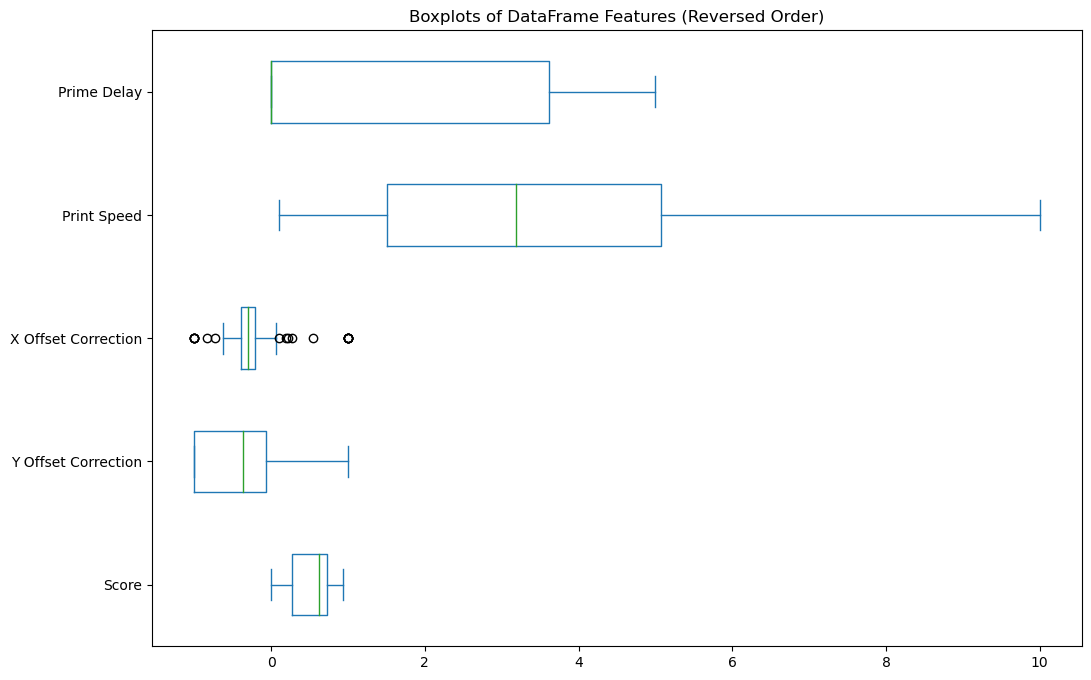

In [16]:
reversed_df = dataset[dataset.columns[::-1]]

# Plotting boxplots for each feature in reversed order
reversed_df.plot(kind='box', vert=False, figsize=(12, 8))
plt.title('Boxplots of DataFrame Features (Reversed Order)')
plt.show()

In [20]:
dataset.describe()

,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction,Score
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.592659,3.730587,-0.229999,-0.390516,0.513623
std,2.075186,3.194226,0.420147,0.590707,0.298266
min,0.000000,0.100000,-1.000000,-1.000000,0.000000
25%,0.000000,1.506706,-0.397005,-1.000000,0.268992
50%,0.000000,3.188204,-0.300239,-0.369307,0.622119
75%,3.611255,5.077803,-0.210090,-0.062338,0.728958
max,5.000000,10.000000,1.000000,1.000000,0.936549


In [21]:
processed_dataset.describe()

,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction,Score
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.592659,3.730587,-0.229999,-0.390516,0.513623
std,2.075186,3.194226,0.420147,0.590707,0.298266
min,0.000000,0.100000,-1.000000,-1.000000,0.000000
25%,0.000000,1.506706,-0.397005,-1.000000,0.268992
50%,0.000000,3.188204,-0.300239,-0.369307,0.622119
75%,3.611255,5.077803,-0.210090,-0.062338,0.728958
max,5.000000,10.000000,1.000000,1.000000,0.936549


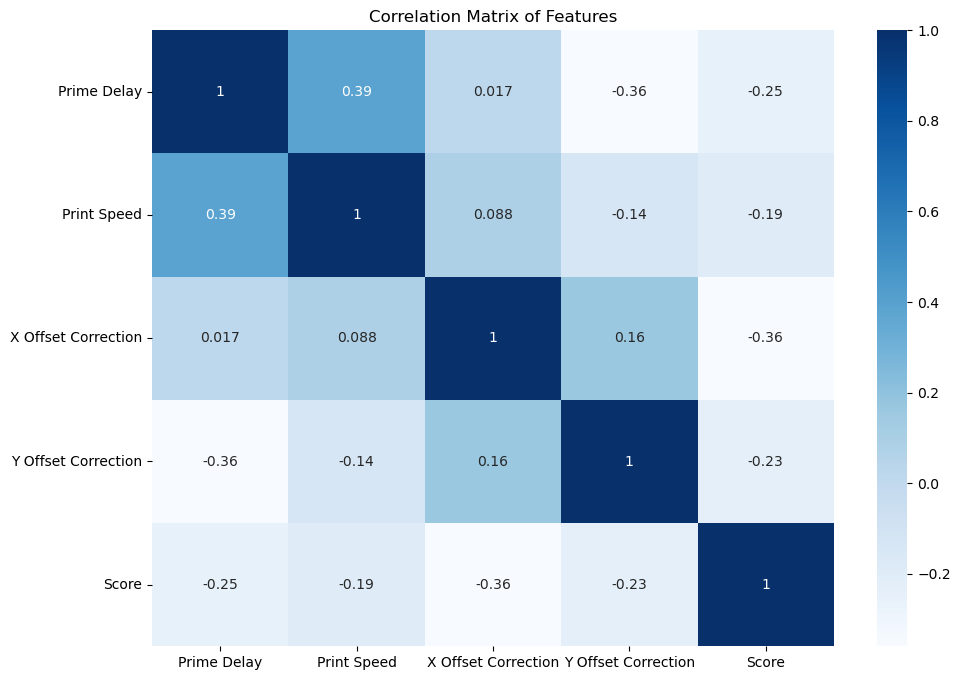

In [22]:
feature_names = list(dataset.columns)[:-1]

# Select only the relevant features for the correlation matrix
selected_columns = feature_names + [list(dataset.columns)[-1]]
df = dataset[selected_columns].copy()

# Create a correlation matrix
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Correlation Matrix of Features")
plt.show()
